# Online Inscriptions from 26/MAR - 5/JUL 2020 to the National Employment Agency Spain

### Link to the data : https://datos.madrid.es/portal/site/egob/menuitem.c05c1f754a33a9fbe4b2e4b284f1a5a0/?vgnextoid=7b3b691ac70e2710VgnVCM1000001d4a900aRCRD&vgnextchannel=374512b9ace9f310VgnVCM100000171f5a0aRCRD&vgnextfmt=default

In [1]:
#Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import chardet
with open('data/inscripciones_online_empleo_covid19.csv', 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))
result

{'encoding': 'ISO-8859-1', 'confidence': 0.73, 'language': ''}

In [3]:
empleo_covid = pd.read_csv('data/inscripciones_online_empleo_covid19.csv',encoding='ISO-8859-1',sep=';')

In [4]:
empleo_covid.head()

,Fecha de Inscripción,Género,Distrito,Tramos de Edad,Nivel Educativo,Desempleada/o e inscrita/o como demandante de empleo en una ofic,Servicio demandado
0,mar-20,Hombre,Carabanchel,Entre 26 y 35 años,FP Grado Medio,Si,Intermediacion
1,mar-20,Mujer,Centro,Entre 36 y 45 años,FP Grado Superior,Si,"Orientacion,Intermediacion"
2,mar-20,Mujer,CiudadLineal,Entre 36 y 45 años,Estudios de Grado (Diplomado / Licenciado),Si,Intermediacion
3,mar-20,Mujer,Chamartin,Entre 46 y 55 años,Estudios de Grado (Diplomado / Licenciado),Si,Intermediacion
4,mar-20,Hombre,SanBlasCanillejas,Entre 46 y 55 años,Estudios de Grado (Diplomado / Licenciado),Si,Intermediacion


In [5]:
empleo_covid.shape

(1956, 7)

In [6]:
empleo_covid.replace(to_replace=['mar-20','abr-20','may-20','jun-20','jul-20'],value=['Marzo','Abril','Mayo','Junio','Julio'],inplace=True)

In [7]:
empleo_covid.head()
empleo_covid['Tramos de Edad'].value_counts()

Entre 36 y 45 años    579
Entre 26 y 35 años    565
Entre 46 y 55 años    427
Menor de 25 años      277
Entre 56 y 65 años    108
Name: Tramos de Edad, dtype: int64

<AxesSubplot:xlabel='Fecha de Inscripción', ylabel='Count'>

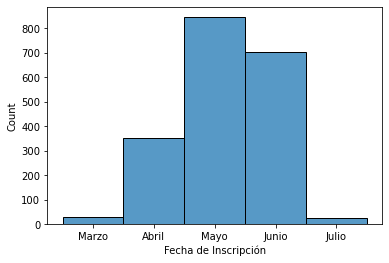

In [8]:
sns.histplot(data=empleo_covid,x='Fecha de Inscripción')

### May has the highest count of inscripcions followed by June, which were the worst months for unemployment and COVID peak

<AxesSubplot:xlabel='Tramos de Edad', ylabel='count'>

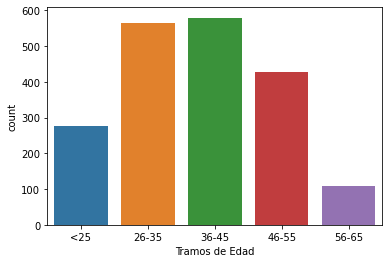

In [9]:
empleo_covid.replace(to_replace=['Entre 26 y 35 años','Entre 36 y 45 años','Entre 46 y 55 años','Menor de 25 años','Entre 56 y 65 años'],value=['26-35','36-45','46-55','<25','56-65'],inplace=True)
sns.countplot(data=empleo_covid,x='Tramos de Edad',order=['<25','26-35','36-45','46-55','56-65'])

### The pandemic affected most the population between 36 and 45 years followed by 26 to 35. These range of ages are the most prolific in a society

In [10]:
#Create Chrolopeth map

count=empleo_covid['Distrito'].value_counts()
count1 = pd.DataFrame(count)
count1.reset_index(inplace=True)
count1.rename(columns={'index':'Distrito','Distrito':'Numero'},inplace=True)
count1.replace(to_replace=['MoncloaAravaca','VillaVallecas','Vicalvaro','Tetuan','Chamberi','Chamartin','PuenteVallecas','CiudadLineal','SanBlasCanillejas','Fuencarral'],value=['Moncloa - Aravaca','Villa de Vallecas','Vicálvaro','Tetuán','Chamberí','Chamartín','Puente de Vallecas','Ciudad Lineal','San Blas - Canillejas','Fuencarral - El Pardo'],inplace=True)
count1

,Distrito,Numero
0,Villaverde,173
1,Carabanchel,167
2,Puente de Vallecas,162
3,Centro,139
4,Usera,123
5,Latina,116
6,Ciudad Lineal,91
7,Villa de Vallecas,74
8,Arganzuela,70
9,San Blas - Canillejas,66


### Create Map with the data superimposed

In [12]:
#Lat Long Madrid
import folium

lat=40.4167754
long=-3.7037902
madrid_geo=r'geojson/distritos-1.geojson'
madrid_map = folium.Map(location=[lat, long], zoom_start=11)

folium.Choropleth(
    geo_data=madrid_geo,
    data=count1,
    columns=['Distrito', 'Numero'],
    key_on='feature.properties.nombre',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Numero de peticiones'
).add_to(madrid_map)

# display map
madrid_map

### Villaverde, Carabanchel and Puente de Vallecas have the higher number of inscriptions, meaning they have higher level of unemployment. Which is related to the income levels of those districs